# 1. Perkenalan

    =================================================
    Milestone 2

    Nama  : Raffi Nurmaysi
    Batch : FTDS-029

    =================================================
Objective:
- Mampu memahami konsep Machine Learning secara keseluruhan.
- Mampu mempersiapkan data untuk digunakan dalam model Supervised Learning (Classification atau Regression).
- Mampu mengimplementasikan Supervised Learning (Classification atau Regression) dengan data yang dipilih.
- Mampu melakukan Hyperparameter Tuning dan Model Improvement.
- Mampu melakukan Model Deployment.

# 2. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from scipy.stats import spearmanr, kendalltau, pearsonr
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from xgboost import XGBClassifier

import json
import pickle

# 3. Data Loading

In [2]:
# membuka dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv')
# menampilkan isi dari dataseet
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [3]:
df = df.drop(columns=['Income'])

In [4]:
# Preview Data Awal (Top 10 Baris)
df.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,4.963459,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9,9.463426,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,9,7.648981,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,6,1.514821,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,2,7.798752,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,7,0.627356,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,4,10.543780,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,5,11.348787,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4,4.055115,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [5]:
# Preview Data Akhir (Bottom 10 Baris)
df.tail(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8753,NVC8704,82,Male,311,126/108,87,0,1,1,1,...,7,8.402977,27.694240,515,1,5,Australia,Australia,Southern Hemisphere,1
8754,LZM3606,80,Female,383,153/96,91,1,1,1,0,...,3,8.234883,20.490450,174,3,4,Argentina,South America,Southern Hemisphere,1
8755,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,3,10.516775,33.469360,296,7,5,Spain,Europe,Southern Hemisphere,0
8756,BUE0416,22,Male,347,115/87,108,0,1,1,0,...,1,6.786750,20.295054,641,2,9,Canada,North America,Northern Hemisphere,1
8757,YDX2478,59,Female,378,93/78,99,0,1,1,1,...,4,7.495231,39.976061,158,1,9,China,Asia,Northern Hemisphere,0
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,8,10.806373,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,8,3.833038,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,5,2.375214,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,5,0.029104,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,8,9.005234,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [6]:
# Menampilkan informasi struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [7]:
# Menyederhanakan nama kolom agar lebih mudah dipakai
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Tampilkan kolom
df.columns


Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk'],
      dtype='object')

In [8]:
# Mengecek jumlah nilai null pada setiap kolom
df.isnull().sum()

patient_id                         0
age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
heart_attack_risk                  0
dtype: int64

In [9]:
# Mengecek jumlah data duplikat dalam dataset
df.duplicated().sum()

0

# 4. Exploratory Data Analysis (EDA)

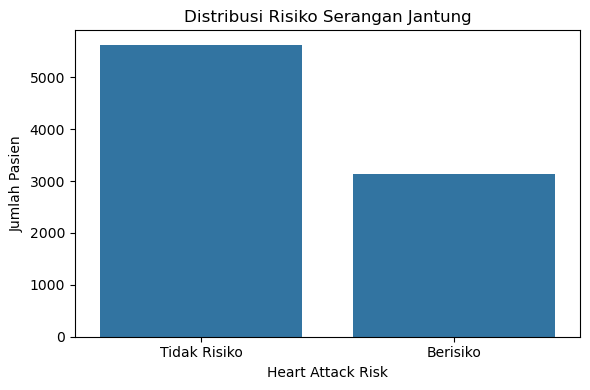

In [10]:
# EDA 1: Distribusi Risiko Serangan Jantung (Target Variable)

# Membuat canvas figure dengan ukuran 6x4 inci
plt.figure(figsize=(6,4))

# Membuat visualisasi countplot untuk kolom 'heart_attack_risk'
sns.countplot(data=df, x='heart_attack_risk')

# Menambahkan judul grafik
plt.title('Distribusi Risiko Serangan Jantung')

# Memberikan label pada sumbu x dan y
plt.xlabel('Heart Attack Risk')
plt.ylabel('Jumlah Pasien')

# Mengganti label pada sumbu x: 0 menjadi 'Tidak Risiko', 1 menjadi 'Berisiko'
plt.xticks([0,1], ['Tidak Risiko', 'Berisiko'])

# Menyesuaikan tata letak agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


Insight

Dari grafik distribusi heart_attack_risk, terlihat bahwa jumlah pasien yang tidak berisiko (label 0) jauh lebih banyak dibandingkan yang berisiko (label 1). Artinya, dataset ini memiliki imbalance class atau ketidakseimbangan kelas target.

Implikasi

Ketidakseimbangan ini bisa memengaruhi performa model klasifikasi, sehingga nanti perlu dipertimbangkan teknik seperti SMOTE, undersampling, atau class weight.

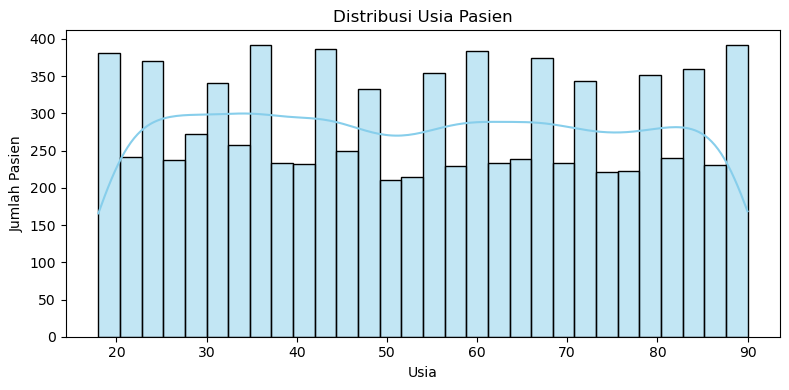

In [11]:
# Membuat canvas figure dengan ukuran 8x4 inci
plt.figure(figsize=(8,4))

# Membuat histogram distribusi usia pasien dengan garis KDE (Kernel Density Estimation)
sns.histplot(data=df, x='age', kde=True, bins=30, color='skyblue')

# Menambahkan judul grafik
plt.title('Distribusi Usia Pasien')

# Memberikan label pada sumbu x dan y
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')

# Menyesuaikan tata letak agar rapi dan tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

Insight

- Mayoritas pasien berada di rentang usia 20–50 tahun, dengan puncak di sekitar usia 30-an.
- Ada distribusi yang cukup lebar, dari usia sangat muda (mungkin <25) hingga lansia (>70).
- Kurva KDE (garis halus) menunjukkan bahwa distribusi usia agak positif skewed (lebih panjang ke kanan), artinya ada lebih sedikit pasien di kelompok usia tua.

Implikasi

Usia adalah faktor risiko penting untuk serangan jantung. Kelompok usia tua meskipun sedikit, tapi bisa jadi berisiko tinggi. Perlu analisis lanjutan hubungan antara age dan heart_attack_risk.

C:\Users\LEGION\AppData\Local\Temp\ipykernel_33224\2562716025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='heart_attack_risk', y='age', palette='Set2')


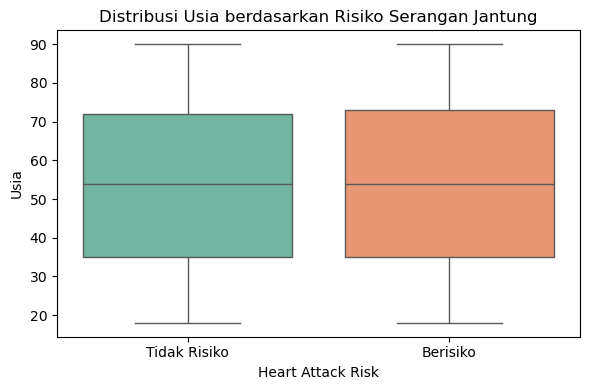

In [12]:
# Membuat canvas figure dengan ukuran 6x4 inci
plt.figure(figsize=(6,4))

# Membuat boxplot untuk melihat distribusi usia berdasarkan status risiko serangan jantung
sns.boxplot(data=df, x='heart_attack_risk', y='age', palette='Set2')

# Menambahkan judul grafik
plt.title('Distribusi Usia berdasarkan Risiko Serangan Jantung')

# Memberikan label pada sumbu x dan y
plt.xlabel('Heart Attack Risk')
plt.ylabel('Usia')

# Mengubah label sumbu x: 0 menjadi 'Tidak Risiko', 1 menjadi 'Berisiko'
plt.xticks([0,1], ['Tidak Risiko', 'Berisiko'])

# Menyesuaikan tata letak agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

Insight

- Pasien yang berisiko terkena serangan jantung (label 1) memiliki usia lebih tinggi secara umum dibandingkan yang tidak berisiko.
- Namun, ada outlier usia muda yang tetap masuk kelompok risiko — ini menunjukkan usia muda bukan jaminan aman.
- Median usia lebih tinggi pada kelompok berisiko, menunjukkan usia adalah variabel prediktor penting.

Implikasi

Semakin tua usia seseorang, semakin tinggi kemungkinan masuk kelompok risiko, namun kita juga harus waspada bahwa ada individu muda yang juga berisiko — mungkin karena faktor lain seperti gaya hidup, penyakit penyerta, dsb.

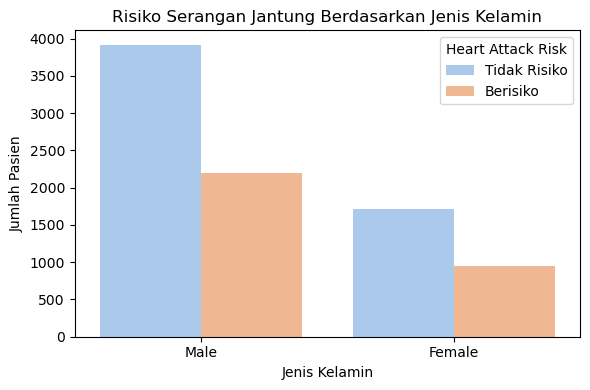

In [13]:
# Membuat canvas figure dengan ukuran 6x4 inci
plt.figure(figsize=(6,4))

# Membuat countplot untuk menghitung jumlah pasien berdasarkan jenis kelamin (sex)
# dan dibedakan berdasarkan status risiko serangan jantung (hue)
sns.countplot(data=df, x='sex', hue='heart_attack_risk', palette='pastel')

# Menambahkan judul grafik
plt.title('Risiko Serangan Jantung Berdasarkan Jenis Kelamin')

# Memberikan label pada sumbu x dan y
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien')

# Menambahkan legenda untuk membedakan kategori risiko
plt.legend(title='Heart Attack Risk', labels=['Tidak Risiko', 'Berisiko'])

# Menyesuaikan tata letak agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


Insight

- Pasien laki-laki (Male) secara umum lebih banyak dibandingkan perempuan dalam dataset ini.
- Jumlah laki-laki yang berisiko terkena serangan jantung (label 1) juga tampak lebih besar dibandingkan perempuan.
- Sementara itu, perempuan terlihat memiliki proporsi risiko lebih rendah.

Implikasi

Dalam dataset ini, laki-laki lebih berisiko terkena serangan jantung. Hal ini sejalan dengan temuan medis bahwa pria cenderung mengalami serangan jantung pada usia yang lebih muda dibanding wanita.

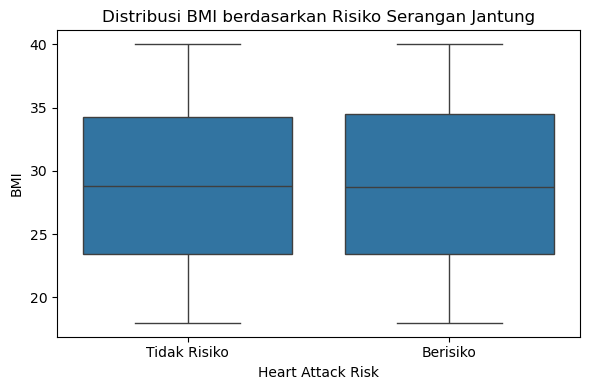

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='heart_attack_risk', y='bmi') 
plt.title('Distribusi BMI berdasarkan Risiko Serangan Jantung')
plt.xlabel('Heart Attack Risk')
plt.ylabel('BMI')
plt.xticks([0,1], ['Tidak Risiko', 'Berisiko'])
plt.tight_layout()
plt.show()

Insight

- Kelompok pasien yang berisiko terkena serangan jantung (label 1) cenderung memiliki nilai BMI lebih tinggi.
- Median BMI lebih tinggi pada kelompok risiko, dan rentang BMI juga lebih lebar.
- Ini menunjukkan bahwa kelebihan berat badan dan obesitas bisa meningkatkan risiko serangan jantung.

Implikasi

BMI dapat digunakan sebagai fitur penting dalam model prediksi serangan jantung. Pasien dengan BMI tinggi perlu perhatian lebih dalam intervensi kesehatan preventif.

C:\Users\LEGION\AppData\Local\Temp\ipykernel_33224\3518794361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='heart_attack_risk', y='cholesterol', palette='viridis')


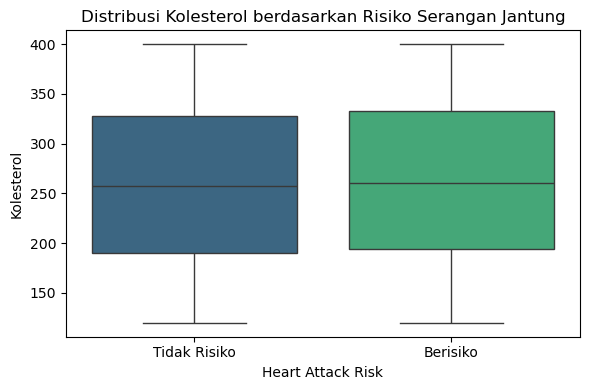

In [15]:
# Membuat canvas figure dengan ukuran 6x4 inci
plt.figure(figsize=(6,4))

# Membuat boxplot untuk melihat distribusi kadar kolesterol berdasarkan status risiko serangan jantung
sns.boxplot(data=df, x='heart_attack_risk', y='cholesterol', palette='viridis')

# Menambahkan judul grafik
plt.title('Distribusi Kolesterol berdasarkan Risiko Serangan Jantung')

# Memberikan label pada sumbu x dan y
plt.xlabel('Heart Attack Risk')
plt.ylabel('Kolesterol')

# Mengubah label sumbu x: 0 menjadi 'Tidak Risiko', 1 menjadi 'Berisiko'
plt.xticks([0,1], ['Tidak Risiko', 'Berisiko'])

# Menyesuaikan tata letak agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

Insight

- Pasien dengan risiko serangan jantung (label 1) umumnya memiliki nilai kolesterol yang lebih tinggi dibandingkan yang tidak berisiko.
- Tampak bahwa distribusi kolesterol di kelompok berisiko juga lebih menyebar (banyak variasi), bahkan ada outlier ekstrem.
- Median kolesterol di kelompok risiko lebih tinggi dari kelompok tidak risiko.

Implikasi

Kadar kolesterol yang tinggi adalah faktor risiko utama penyakit jantung. Ini menegaskan pentingnya pengendalian kolesterol dalam pencegahan serangan jantung.

C:\Users\LEGION\AppData\Local\Temp\ipykernel_33224\564745193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='heart_attack_risk', y='stress_level', palette='flare')


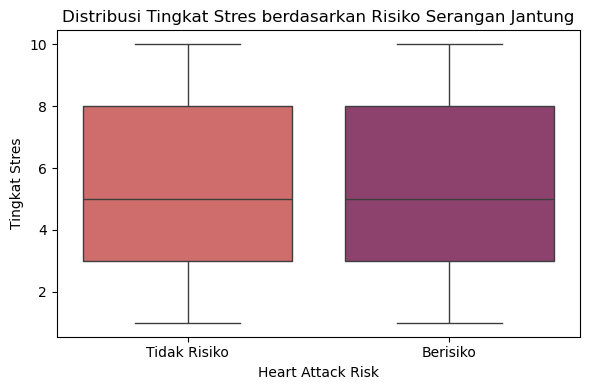

In [16]:
# Membuat canvas figure dengan ukuran 6x4 inci
plt.figure(figsize=(6,4))

# Membuat boxplot untuk melihat distribusi tingkat stres berdasarkan status risiko serangan jantung
sns.boxplot(data=df, x='heart_attack_risk', y='stress_level', palette='flare')

# Menambahkan judul grafik
plt.title('Distribusi Tingkat Stres berdasarkan Risiko Serangan Jantung')

# Memberikan label pada sumbu x dan y
plt.xlabel('Heart Attack Risk')
plt.ylabel('Tingkat Stres')

# Mengubah label sumbu x: 0 menjadi 'Tidak Risiko', 1 menjadi 'Berisiko'
plt.xticks([0,1], ['Tidak Risiko', 'Berisiko'])

# Menyesuaikan tata letak agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

Insight

- Kelompok berisiko (label 1) memiliki tingkat stres yang lebih tinggi secara median dibanding kelompok tidak berisiko.
- Variasi stres juga terlihat lebih luas pada kelompok berisiko, menunjukkan bahwa stres emosinnal dan psikologis memainkan peran penting dalam risiko serangan jantung.
- Beberapa pasien tidak berisiko juga memiliki stres tinggi, tapi proporsinya lebih rendah.

Implikasi 

Stres perlu dipantau dan dikelola sebagai bagian dari strategi pencegahan penyakit jantung, terutama untuk individu dengan faktor risiko lain seperti obesitas, kolesterol tinggi, dan usia tua.

# 5. Feature Engineering

## Handling Cardinality

In [17]:
# Mengatur agar seluruh isi kolom dalam DataFrame bisa ditampilkan tanpa terpotong
pd.set_option('display.max_colwidth', None)

# Mengambil kolom bertipe objek (kategorikal) dan mengecualikan kolom dalam variabel 'exclude'
cat_cols = [c for c in df.select_dtypes(include='object').columns]

# Membuat list kosong untuk menyimpan ringkasan informasi dari setiap kolom kategorikal
listItem = []

# Melakukan iterasi pada setiap kolom kategorikal
for col in cat_cols:
  # Menambahkan informasi nama kolom, jumlah nilai unik, dan nilai uniknya ke dalam list
  listItem.append([col, df[col].nunique(), df[col].unique()])

# Menampilkan hasil eksplorasi dalam bentuk DataFrame
pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)


,nama kolom,jumlah nilai unique,nilai unique
0,patient_id,8763,"[BMW7812, CZE1114, BNI9906, JLN3497, GFO8847, ZOO7941, WYV0966, XXM0972, XCQ5937, FTJ5456, HSD6283, YSP0073, FPS0415, YYU9565, VTW9069, DCY3282, DXB2434, COP0566, XBI0592, RQX1211, MBI0008, RVN4963, LBY7992, RDI3071, NCU1956, MSW4208, TTO9115, JDP9221, FFF6730, DWN2141, SLE3369, NXO4034, ENK3334, XRL5497, DDG3686, FLG2019, IUJ5442, BSV5917, SCZ5893, GNK9443, UYU5044, TTM1692, DUX2118, SQE3213, XBP3543, ENZ9640, QWD3129, UBJ2564, RRG8947, DRT6328, BFE4900, KCY9500, JJX0859, IKY4481, YOD3294, OHD3889, BDG2694, LTU0801, OFU9592, WAR7163, TFH5628, BBJ3290, YTR1728, AYY8711, TQT8266, KTR4778, GVI1884, SOM8522, NHX8643, BNF7145, BOK4939, DNY3115, SOH9843, ICO9779, GDC1817, DHP4080, RWL3584, JPD8131, GMI1141, QJA1796, WMP6003, ADG8069, RHR1854, GDY0435, CQM6221, JDS3385, HYS8827, JXV3603, OVT8107, UIW1798, XZD4751, OKX6945, RKV2333, TLA1423, NCU4581, XOA9385, SLJ3300, ONL5969, CFU1297, ATI9164, ...]"
1,sex,2,"[Male, Female]"
2,blood_pressure,3915,"[158/88, 165/93, 174/99, 163/100, 91/88, 172/86, 102/73, 131/68, 144/105, 160/70, 107/69, 158/71, 101/72, 169/72, 112/81, 114/88, 173/75, 120/74, 120/100, 160/98, 180/101, 130/84, 175/60, 173/109, 161/90, 140/95, 148/105, 160/76, 113/78, 99/81, 120/77, 178/72, 111/91, 99/85, 103/107, 94/60, 127/109, 134/60, 115/92, 124/93, 104/96, 144/108, 101/90, 115/109, 149/73, 120/63, 106/106, 102/76, 114/92, 173/108, 168/91, 159/79, 100/80, 118/76, 103/83, 152/90, 151/85, 144/98, 109/95, 92/61, 179/93, 120/69, 161/108, 131/76, 107/65, 132/109, 131/97, 177/99, 130/94, 174/93, 110/105, 116/98, 139/107, 164/76, 104/83, 118/86, 122/77, 109/74, 92/65, 151/101, 95/78, 115/73, 148/94, 100/66, 163/110, 122/80, 118/91, 110/104, 149/83, 134/100, 116/85, 165/79, 102/69, 168/107, 160/67, 92/71, 164/65, 155/104, 104/98, 159/76, ...]"
3,diet,3,"[Average, Unhealthy, Healthy]"
4,country,20,"[Argentina, Canada, France, Thailand, Germany, Japan, Brazil, South Africa, United States, Vietnam, China, Italy, Spain, India, Nigeria, New Zealand, South Korea, Australia, Colombia, United Kingdom]"
5,continent,6,"[South America, North America, Europe, Asia, Africa, Australia]"
6,hemisphere,2,"[Southern Hemisphere, Northern Hemisphere]"


## Split Data

In [36]:
# Buang kolom yang tidak relevan atau tidak memberikan informasi penting untuk pemodelan
drop_cols = ['patient_id', 'country', 'continent', 'hemisphere']
df_model = df.drop(columns=drop_cols)

# Memisahkan fitur (X) dan target (y)
X = df_model.drop(columns='heart_attack_risk')  # Semua kolom kecuali target
y = df_model['heart_attack_risk']               # Kolom target (variabel yang ingin diprediksi)

X_train = df_model
X_test = df_model


In [37]:
X_train

,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,Healthy,1,1,8,10.806373,19.655895,67,7,7,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,Healthy,0,0,8,3.833038,23.993866,617,4,9,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,Average,1,0,5,2.375214,35.406146,527,4,4,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,Unhealthy,1,1,5,0.029104,27.294020,114,2,8,0


In [38]:
X_test

,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,Healthy,1,1,8,10.806373,19.655895,67,7,7,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,Healthy,0,0,8,3.833038,23.993866,617,4,9,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,Average,1,0,5,2.375214,35.406146,527,4,4,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,Unhealthy,1,1,5,0.029104,27.294020,114,2,8,0


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8763 non-null   int64  
 1   sex                              8763 non-null   object 
 2   cholesterol                      8763 non-null   int64  
 3   blood_pressure                   8763 non-null   object 
 4   heart_rate                       8763 non-null   int64  
 5   diabetes                         8763 non-null   int64  
 6   family_history                   8763 non-null   int64  
 7   smoking                          8763 non-null   int64  
 8   obesity                          8763 non-null   int64  
 9   alcohol_consumption              8763 non-null   int64  
 10  exercise_hours_per_week          8763 non-null   float64
 11  diet                             8763 non-null   object 
 12  previous_heart_probl

In [40]:
X_train.shape, X_test.shape

((8763, 21), (8763, 21))

In [41]:
X_train.isnull().sum()

age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
heart_attack_risk                  0
dtype: int64

In [42]:
X_test.isnull().sum()

age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
heart_attack_risk                  0
dtype: int64

In [43]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
heart_rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
family_history,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
alcohol_consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
exercise_hours_per_week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
previous_heart_problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [44]:
# Mengambil kolom target 'heart_attack_risk' dari X_train sebagai y_train
y_train = X_train.heart_attack_risk

# Menghapus kolom 'heart_attack_risk' dari X_train agar hanya berisi fitur
X_train = X_train.drop(['heart_attack_risk'], axis=1)

# Mengambil kolom target 'heart_attack_risk' dari X_test sebagai y_test
y_test = X_test.heart_attack_risk

# Menghapus kolom 'heart_attack_risk' dari X_test agar hanya berisi fitur
X_test = X_test.drop(['heart_attack_risk'], axis=1)

## Handling Outliers

### Handling Outliers in Train Set

In [45]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
heart_rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
family_history,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
alcohol_consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
exercise_hours_per_week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
previous_heart_problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [46]:
# Mengecek distribusi bentuk (normal atau skewed) berdasarkan nilai skewness
# Mengambil nama-nama kolom numerik dari X_train
num_cols = list(X_train.select_dtypes(exclude='object').columns)

# Membuat list kosong untuk menyimpan hasil perhitungan skewness
listItem = []

# Iterasi setiap kolom numerik
for col in num_cols:
  # Hitung nilai skewness dan kategorikan sebagai 'normal' atau 'skewed'
  listItem.append([
    col,
    round(X_train[col].skew(), 1),  # Nilai skewness dibulatkan ke 1 desimal
    np.where(
      (round(X_train[col].skew(), 1) <= 0.5) & (round(X_train[col].skew(), 1) >= -0.5),
      'normal',
      'skewed'                      # Skewness di luar rentang -0.5 s.d 0.5 dianggap tidak normal
    )
  ])

# Membuat DataFrame dari hasil list
skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data=listItem)

# Menampilkan DataFrame hasil analisis skewness
skewness


,nama kolom,nilai skewness,distribution
0,age,0.0,normal
1,cholesterol,-0.0,normal
2,heart_rate,-0.0,normal
3,diabetes,-0.6,skewed
4,family_history,0.0,normal
5,smoking,-2.6,skewed
6,obesity,-0.0,normal
7,alcohol_consumption,-0.4,normal
8,exercise_hours_per_week,-0.0,normal
9,previous_heart_problems,0.0,normal


In [47]:
# Mendapatkan hanya kolom numerik dari X_train
num_train = X_train._get_numeric_data()

# Iterasi setiap kolom numerik di num_train
for k, v in num_train.items():
    # Cek nilai skewness untuk menentukan metode deteksi outlier
    if -0.5 <= round(v.skew(), 1) <= 0.5:
        # Jika distribusi data normal (skewness antara -0.5 dan 0.5)
        # Gunakan metode Z-score manual untuk deteksi outlier
        mean = v.mean()
        std = v.std()
        threshold = 3  # Batas Z-score ±3

        # Identifikasi outlier berdasarkan Z-score
        v_outliers = v[(v < mean - threshold * std) | (v > mean + threshold * std)]

        # Hitung batas bawah dan atas Z-score
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
    else:
        # Jika distribusi tidak normal
        # Gunakan metode IQR (Interquartile Range) untuk deteksi outlier
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1

        # Identifikasi outlier berdasarkan IQR
        v_outliers = v[(v < q1 - 1.5 * iqr) | (v > q3 + 1.5 * iqr)]

        # Hitung batas bawah dan atas IQR
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

    # Hitung persentase data yang termasuk outlier di kolom tersebut
    perc = (len(v_outliers) / len(v)) * 100

    # Cetak hasil informasi batas dan persentase outlier
    print(f"Column {k} - Lower bound: {round(lower_bound,3)}, Upper bound: {round(upper_bound,3)}, Outliers = {perc:.2f}%")


Column age - Lower bound: -10.041, Upper bound: 117.457, Outliers = 0.00%
Column cholesterol - Lower bound: 17.287, Upper bound: 502.467, Outliers = 0.00%
Column heart_rate - Lower bound: 13.369, Upper bound: 136.675, Outliers = 0.00%
Column diabetes - Lower bound: -1.5, Upper bound: 2.5, Outliers = 0.00%
Column family_history - Lower bound: -1.007, Upper bound: 1.993, Outliers = 0.00%
Column smoking - Lower bound: 1.0, Upper bound: 1.0, Outliers = 10.32%
Column obesity - Lower bound: -0.999, Upper bound: 2.002, Outliers = 0.00%
Column alcohol_consumption - Lower bound: -0.873, Upper bound: 2.069, Outliers = 0.00%
Column exercise_hours_per_week - Lower bound: -7.337, Upper bound: 27.366, Outliers = 0.00%
Column previous_heart_problems - Lower bound: -1.004, Upper bound: 1.996, Outliers = 0.00%
Column medication_use - Lower bound: -1.002, Upper bound: 1.998, Outliers = 0.00%
Column stress_level - Lower bound: -3.109, Upper bound: 14.049, Outliers = 0.00%
Column sedentary_hours_per_day -

## Handling Missing Values

In [30]:
X_train.isnull().sum()

age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
dtype: int64

In [31]:
X_test.isnull().sum()

age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
dtype: int64

In [32]:
X_train.columns.tolist()

['age',
 'sex',
 'cholesterol',
 'blood_pressure',
 'heart_rate',
 'diabetes',
 'family_history',
 'smoking',
 'obesity',
 'alcohol_consumption',
 'exercise_hours_per_week',
 'diet',
 'previous_heart_problems',
 'medication_use',
 'stress_level',
 'sedentary_hours_per_day',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day']

## Feature Selection using Feature Importance

C:\Users\LEGION\AppData\Local\Temp\ipykernel_33224\3330989536.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_train = X_train.apply(pd.to_numeric, errors='ignore')
C:\Users\LEGION\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:41:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


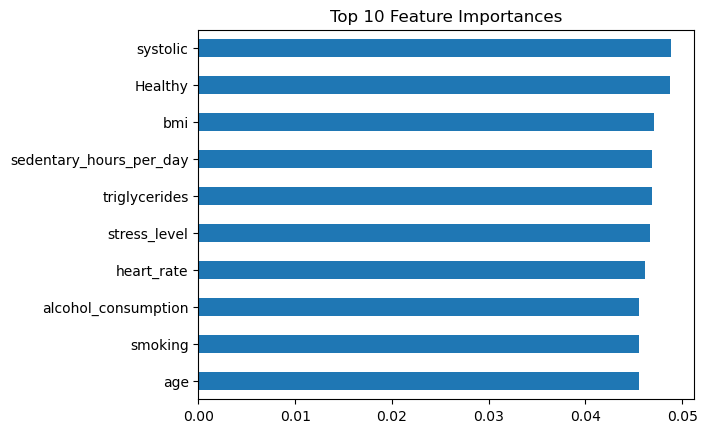

In [48]:
# Pisahkan kolom blood_pressure jadi systolic dan diastolic
bp_split = X_train['blood_pressure'].str.split('/', expand=True)
X_train['systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
X_train['diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
X_train = X_train.drop(columns='blood_pressure')

# Ulangi proses untuk test set juga kalau nanti digunakan

# Pastikan tidak ada kolom object lagi
X_train = X_train.apply(pd.to_numeric, errors='ignore')

# Encode kolom kategorikal string
categorical_cols = ['sex', 'diet']
X_train_ohe = pd.get_dummies(X_train, columns=categorical_cols, prefix='', prefix_sep='')

label_encoder = LabelEncoder()
y_train_ohe = label_encoder.fit_transform(y_train)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_ohe, y_train_ohe)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=X_train_ohe.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [49]:
X_train.columns, X_test.columns

(Index(['age', 'sex', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
        'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
        'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
        'sedentary_hours_per_day', 'bmi', 'triglycerides',
        'physical_activity_days_per_week', 'sleep_hours_per_day', 'systolic',
        'diastolic'],
       dtype='object'),
 Index(['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes',
        'family_history', 'smoking', 'obesity', 'alcohol_consumption',
        'exercise_hours_per_week', 'diet', 'previous_heart_problems',
        'medication_use', 'stress_level', 'sedentary_hours_per_day', 'bmi',
        'triglycerides', 'physical_activity_days_per_week',
        'sleep_hours_per_day'],
       dtype='object'))

In [53]:
#Normalisasi nama kolom
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

#Buang kolom tidak relevan
drop_cols = ['patient_id', 'country', 'continent', 'hemisphere']
df_model = df.drop(columns=drop_cols)

#Pisahkan fitur dan target
X = df_model.drop(columns='heart_attack_risk')
y = df_model['heart_attack_risk']

#Pisahkan tekanan darah (blood_pressure jadi systolic & diastolic)
bp_split = X['blood_pressure'].str.split('/', expand=True)
X['systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
X['diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
X = X.drop(columns='blood_pressure')

#One-hot encoding kolom kategorikal bertipe string
X_encoded = pd.get_dummies(X, columns=['sex', 'diet'], drop_first=True)

#Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:
y = df_model['heart_attack_risk']

# Jumlah tiap kelas
print("Distribusi Kelas:")
print(y.value_counts())

# Persentase tiap kelas
print("\nPersentase Kelas:")
print(y.value_counts(normalize=True) * 100)


Distribusi Kelas:
heart_attack_risk
0    5624
1    3139
Name: count, dtype: int64

Persentase Kelas:
heart_attack_risk
0    64.178934
1    35.821066
Name: proportion, dtype: float64


## Scaling

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Transform

In [56]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object')),
('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

## SMOTE

In [57]:
# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 6. Model Definition

In [58]:
# Pipeline KNN
pipe_knn = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=5))
])
pipe_knn

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB17560>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB174A0>)])),
                ('smote', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier())])

In [59]:
# Pipeline SVM
pipe_svm = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(kernel='rbf', probability=True))
])
pipe_svm

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB17560>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB174A0>)])),
                ('smote', SMOTE(random_state=42)),
                ('model', SVC(probability=True))])

In [60]:
# Pipeline Decision Tree
pipe_dt = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])
pipe_dt

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB17560>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB174A0>)])),
                ('smote', SMOTE(random_state=42)),
                ('model', DecisionTreeClassifier(random_state=42))])

In [61]:
# Pipeline Random Forest
pipe_rf = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])
pipe_rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB17560>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB174A0>)])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [62]:
# Pipeline XGBoost
pipe_xgb = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
pipe_xgb

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB17560>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB174A0>)])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 XGBClassifier(ba...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

## KNN

In [63]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.6951
Testing Score:  0.4877


In [64]:
# Fit model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi training
y_train_pred = knn.predict(X_train_scaled)

# Prediksi test
y_test_pred = knn.predict(X_test_scaled)

# Laporan Train
print('🔹 KNN Classification Report - Train Data')
print(classification_report(y_train, y_train_pred))
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

# Laporan Test
print('\n🔹 KNN Classification Report - Test Data')
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

🔹 KNN Classification Report - Train Data
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      4499
           1       0.65      0.44      0.52      2511

    accuracy                           0.71      7010
   macro avg       0.69      0.65      0.66      7010
weighted avg       0.70      0.71      0.70      7010

Train Accuracy: 0.7141226818830243

🔹 KNN Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.65      0.77      0.70      1125
           1       0.38      0.25      0.30       628

    accuracy                           0.58      1753
   macro avg       0.51      0.51      0.50      1753
weighted avg       0.55      0.58      0.56      1753

Test Accuracy: 0.5835710211066742


## SVM

In [65]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.732
Testing Score:  0.5385


In [66]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Accuracy: 0.6417569880205363


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## DESICION TREE

In [67]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.5636


In [68]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [69]:
target = ['heart atack risk yes', 'heart attack risk no']
print(classification_report(y_test, y_dt_pred, target_names = target))

                      precision    recall  f1-score   support

heart atack risk yes       0.67      0.63      0.65      1125
heart attack risk no       0.40      0.44      0.42       628

            accuracy                           0.56      1753
           macro avg       0.53      0.54      0.53      1753
        weighted avg       0.57      0.56      0.57      1753



## RANDOM FOREST CLASSIFIER

In [70]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.6052


In [71]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
target = ['heart atack risk yes', 'heart attack risk no']
print(classification_report(y_test, y_rf_pred, target_names = target))

                      precision    recall  f1-score   support

heart atack risk yes       0.64      0.88      0.74      1125
heart attack risk no       0.35      0.12      0.18       628

            accuracy                           0.61      1753
           macro avg       0.50      0.50      0.46      1753
        weighted avg       0.54      0.61      0.54      1753



## XGBoost Classifier

In [73]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  0.9816
Testing Score:  0.5819


C:\Users\LEGION\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:42:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [74]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([1, 1, 0, ..., 0, 0, 0])

In [75]:
target = ['heart atack risk yes', 'heart attack risk no']
print(classification_report(y_test, y_xgb_pred, target_names = target))

                      precision    recall  f1-score   support

heart atack risk yes       0.64      0.78      0.70      1125
heart attack risk no       0.37      0.24      0.29       628

            accuracy                           0.58      1753
           macro avg       0.51      0.51      0.50      1753
        weighted avg       0.55      0.58      0.55      1753



## Cross Validation

In [76]:
# Daftar pipeline model
models = {
    'KNN': pipe_knn,
    'SVM': pipe_svm,
    'Decision Tree': pipe_dt,
    'Random Forest': pipe_rf,
    'XGBoost': pipe_xgb
}

# Loop dan evaluasi dengan Cross-Validation (F1 Score)
for name, model in models.items():
    print(f"Model: {name}")
    f1_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
    
    print("F1 Score - All  :", f1_scores)
    print("F1 Score - Mean :", round(f1_scores.mean(), 4))
    print("F1 Score - Std  :", round(f1_scores.std(), 4))
    print("F1 Score - Range:", round(f1_scores.mean()-f1_scores.std(), 4), '-', round(f1_scores.mean()+f1_scores.std(), 4))
    print('-'*50)

Model: KNN
F1 Score - All  : [0.43920829 0.4304038  0.43342776]
F1 Score - Mean : 0.4343
F1 Score - Std  : 0.0037
F1 Score - Range: 0.4307 - 0.438
--------------------------------------------------
Model: SVM
F1 Score - All  : [0.35487805 0.3345367  0.34885164]
F1 Score - Mean : 0.3461
F1 Score - Std  : 0.0085
F1 Score - Range: 0.3376 - 0.3546
--------------------------------------------------
Model: Decision Tree
F1 Score - All  : [0.35405565 0.37096774 0.38669673]
F1 Score - Mean : 0.3706
F1 Score - Std  : 0.0133
F1 Score - Range: 0.3572 - 0.3839
--------------------------------------------------
Model: Random Forest
F1 Score - All  : [0.18087855 0.19234043 0.17828773]
F1 Score - Mean : 0.1838
F1 Score - Std  : 0.0061
F1 Score - Range: 0.1777 - 0.1899
--------------------------------------------------
Model: XGBoost


C:\Users\LEGION\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:43:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\LEGION\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:43:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1 Score - All  : [0.31540698 0.25234319 0.2887931 ]
F1 Score - Mean : 0.2855
F1 Score - Std  : 0.0258
F1 Score - Range: 0.2597 - 0.3114
--------------------------------------------------


C:\Users\LEGION\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:43:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Hyperparameter Tuning KNN


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Pipeline sudah didefinisikan sebagai pipe_knn sebelumnya

param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(pipe_knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best Params:", grid_knn.best_params_)
print("Best Score (F1):", grid_knn.best_score_)

Best Params: {'model__metric': 'euclidean', 'model__n_neighbors': 11, 'model__weights': 'uniform'}
Best Score (F1): 0.44996163637205805


# 7. Model Training

In [78]:
# Train KNN
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)

In [79]:
# Train knn
pipe_knn.fit(X_resampled, y_resampled)
y_pred_knn = pipe_knn.predict(X_test)
y_pred_knn

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

# 8. Model Evaluation

In [80]:
models = {
    'KNeighborsClassifier' : pipe_knn
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [81]:
df_model

,KNeighborsClassifier
Accuracy,0.523103
F1-Score,0.375187


In [82]:
param_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2] 
}

In [83]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5).fit(X_train, y_train)

In [84]:
print('Train Set Score : ', grid_knn.score(X_train, y_train))
print('Test Set Score : ', grid_knn.score(X_test, y_test))

Train Set Score :  1.0
Test Set Score :  0.5128351397604107


In [85]:
best_param_knn = grid_knn.best_params_
print(best_param_knn)
print('\n')
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

{'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AA88290>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000265619473E0>)])),
                ('smote', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(p=1, weights='distance'))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model__n_neighbors', 'param_model__p', 'param_model__weights',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', '

In [86]:
print(classification_report(y_test, best_pipe_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59      1125
           1       0.36      0.46      0.40       628

    accuracy                           0.51      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.51      0.52      1753



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB17560>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002657AB174A0>)])),
                ('smote', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier())])

# 9. Model Saving

In [87]:
# Simpan daftar nama kolom numerik ke file teks
import pickle

# Simpan pipeline ke file
with open('pipe_knn.pkl', 'wb') as file:
    pickle.dump(pipe_knn, file)